In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import os
os.chdir('E:\AIMLGLIM\TIME_SERIES_FORECASTING\week2')
os.getcwd()

'E:\\AIMLGLIM\\TIME_SERIES_FORECASTING\\week2'

In [3]:
df_1 = pd.read_csv("monthly sales.csv",parse_dates=True,squeeze=True,index_col=0)

In [4]:
print(df_1.head())
print(df_1.tail())

Month
Jan-13    454904
Feb-13    459417
Mar-13    617382
Apr-13    682274
May-13    763242
Name: Sales, dtype: int64
Month
Aug-17    1026403
Sep-17     935263
Oct-17     891160
Nov-17     928837
Dec-17     695170
Name: Sales, dtype: int64


In [5]:
df_2 = pd.read_csv("monthly sales.csv")

In [8]:
date = pd.date_range(start='1/1/2013', end='1/1/2018', freq='M')

In [7]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

,Month,Sales,Time_Stamp
0,Jan-13,454904,2013-01-31
1,Feb-13,459417,2013-02-28
2,Mar-13,617382,2013-03-31
3,Apr-13,682274,2013-04-30
4,May-13,763242,2013-05-31


In [9]:
df_2['Time_Stamp'] = pd.to_datetime(df_2['Time_Stamp'])

In [10]:
df = df_2.set_index('Time_Stamp')
df.drop(['Month'], axis=1, inplace=True)
df.head()

,Sales
Time_Stamp,
2013-01-31,454904
2013-02-28,459417
2013-03-31,617382
2013-04-30,682274
2013-05-31,763242


In [26]:
df.index[0].year

2013

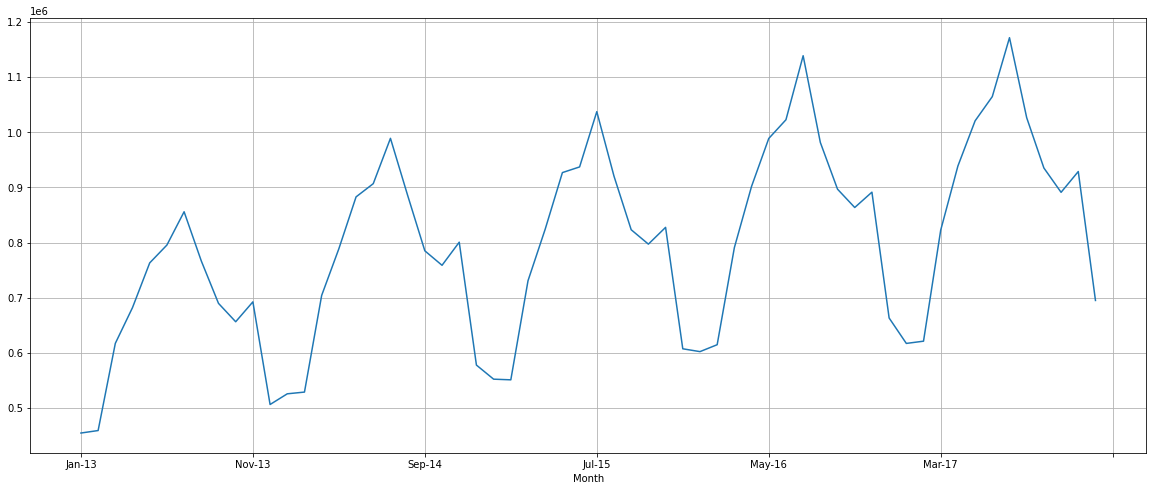

In [15]:
df_1.plot(figsize=(20,8))
plt.grid();

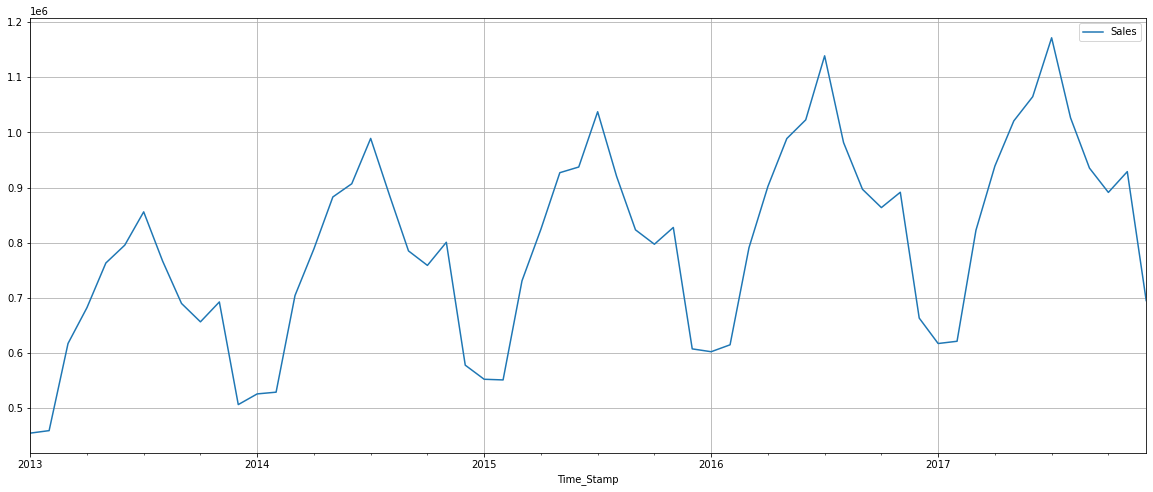

In [16]:
## Plotting the same graph from the second dataframe with the date-time modifications

df.plot(figsize=(20,8))
plt.grid();

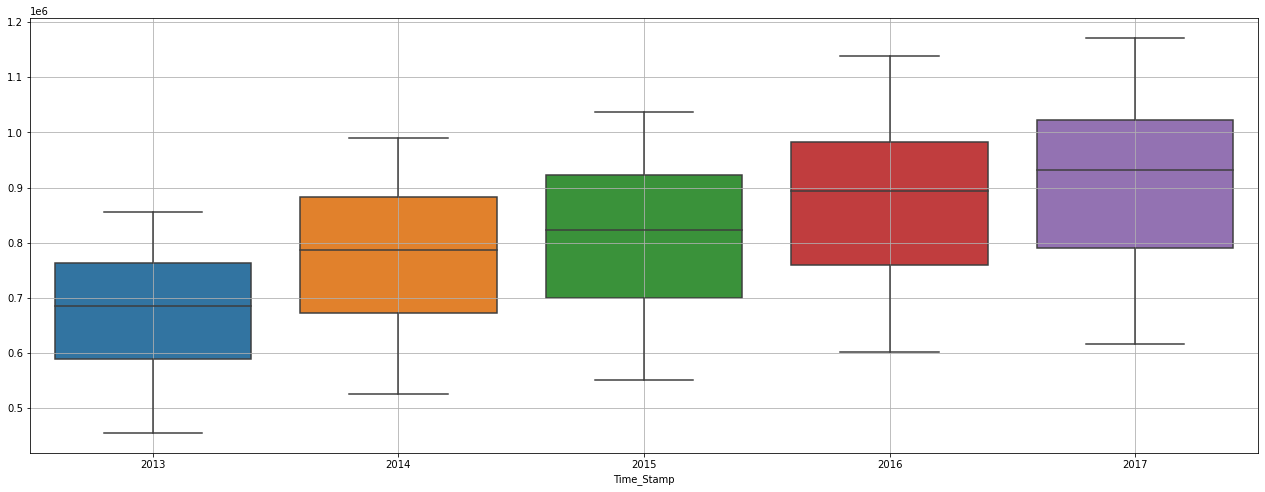

In [17]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

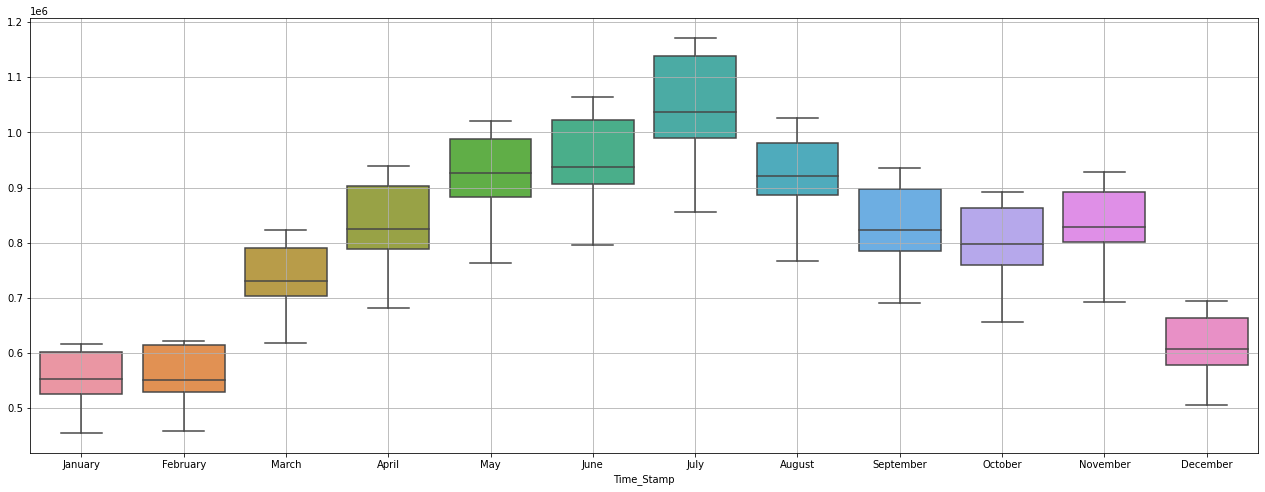

In [27]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [39]:
df.values[:,0]

array([ 454904,  459417,  617382,  682274,  763242,  795597,  855922,
        766761,  689907,  656587,  692643,  506607,  525987,  529117,
        704301,  788914,  882877,  906842,  989010,  885596,  785124,
        758883,  800783,  578048,  552513,  551317,  730951,  824467,
        926902,  937184, 1037350,  920401,  823332,  797253,  827645,
        607572,  602439,  614957,  790881,  901950,  988730, 1022664,
       1138718,  981494,  896831,  863637,  891448,  663411,  617306,
        621369,  822667,  938862, 1020686, 1064624, 1171393, 1026403,
        935263,  891160,  928837,  695170], dtype=int64)

In [40]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
2013,682274,766761,506607,459417,454904,855922,795597,617382,763242,692643,656587,689907
2014,788914,885596,578048,529117,525987,989010,906842,704301,882877,800783,758883,785124
2015,824467,920401,607572,551317,552513,1037350,937184,730951,926902,827645,797253,823332
2016,901950,981494,663411,614957,602439,1138718,1022664,790881,988730,891448,863637,896831
2017,938862,1026403,695170,621369,617306,1171393,1064624,822667,1020686,928837,891160,935263


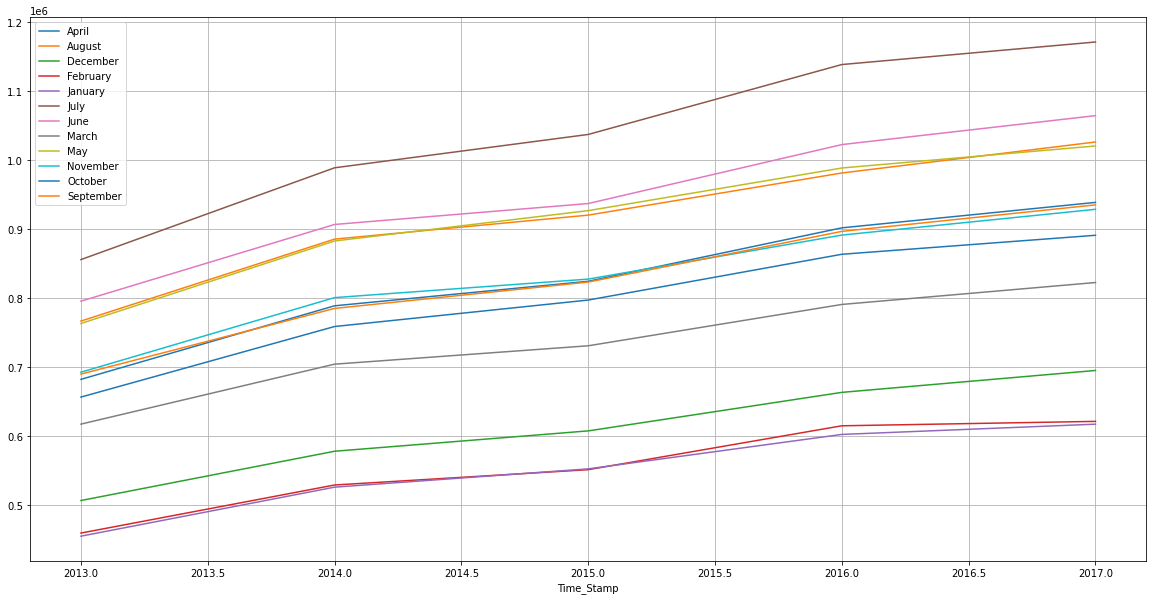

In [41]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

In [42]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

In [46]:
train.head()

,Sales
Time_Stamp,
2013-01-31,454904
2013-02-28,459417
2013-03-31,617382
2013-04-30,682274
2013-05-31,763242


In [43]:
print(train.shape)
print(test.shape)

(42, 1)
(18, 1)


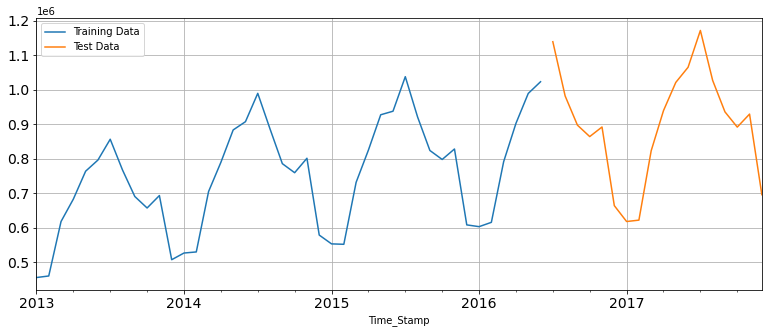

In [44]:
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [45]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


In [47]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [48]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Sales  time
Time_Stamp              
2013-01-31  454904     1
2013-02-28  459417     2
2013-03-31  617382     3
2013-04-30  682274     4
2013-05-31  763242     5 

Last few rows of Training Data 
               Sales  time
Time_Stamp               
2016-02-29   614957    38
2016-03-31   790881    39
2016-04-30   901950    40
2016-05-31   988730    41
2016-06-30  1022664    42 

First few rows of Test Data 
               Sales  time
Time_Stamp               
2016-07-31  1138718    43
2016-08-31   981494    44
2016-09-30   896831    45
2016-10-31   863637    46
2016-11-30   891448    47 

Last few rows of Test Data 
               Sales  time
Time_Stamp               
2017-08-31  1026403    56
2017-09-30   935263    57
2017-10-31   891160    58
2017-11-30   928837    59
2017-12-31   695170    60 



In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

In [52]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

In [53]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

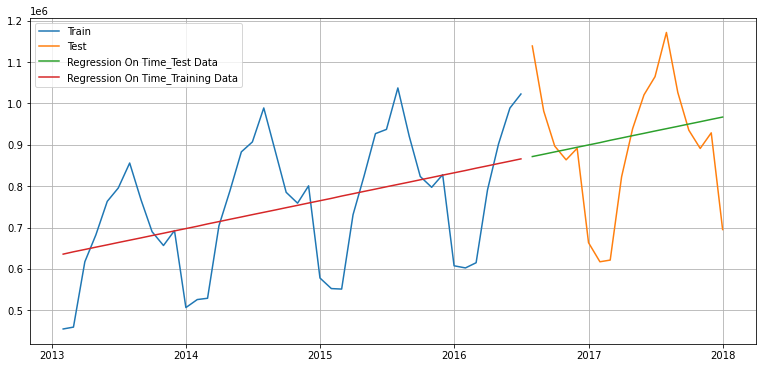

In [54]:
plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [55]:
from sklearn import metrics

In [56]:
## Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [57]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Sales'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sales'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 140913.956 MAPE is 15.42


In [58]:

rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sales'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 163404.817 MAPE is 13.97


In [59]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,13.97


### NAIVE MODEL

In [60]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [62]:
np.asarray(train['Sales'])

array([ 454904,  459417,  617382,  682274,  763242,  795597,  855922,
        766761,  689907,  656587,  692643,  506607,  525987,  529117,
        704301,  788914,  882877,  906842,  989010,  885596,  785124,
        758883,  800783,  578048,  552513,  551317,  730951,  824467,
        926902,  937184, 1037350,  920401,  823332,  797253,  827645,
        607572,  602439,  614957,  790881,  901950,  988730, 1022664],
      dtype=int64)

In [67]:
NaiveModel_train['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
2013-01-31    1022664
2013-02-28    1022664
2013-03-31    1022664
2013-04-30    1022664
2013-05-31    1022664
Name: naive, dtype: int64

In [72]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
2016-07-31    1022664
2016-08-31    1022664
2016-09-30    1022664
2016-10-31    1022664
2016-11-30    1022664
Name: naive, dtype: int64

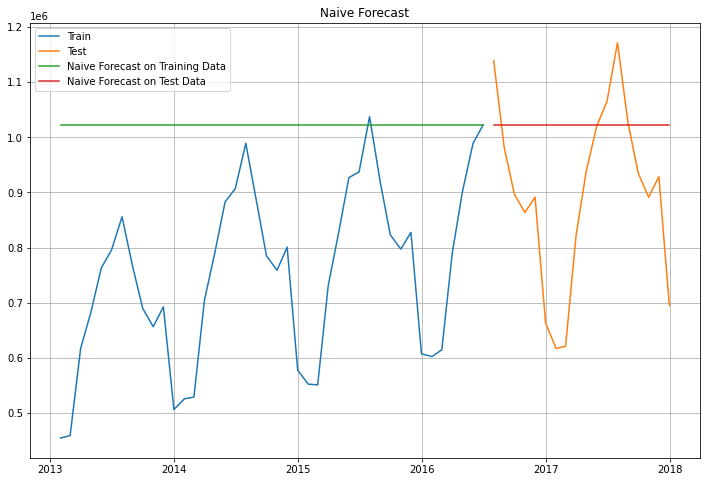

In [73]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [74]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Sales'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Sales'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))


For Naive Model forecast on the Training Data,  RMSE is 313648.937 MAPE is 36.30


In [75]:
rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sales'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 202735.276 MAPE is 17.69


In [76]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,13.97
NaiveModel,202735.276206,17.69


In [78]:
for i in np.arange(0.3,1,0.1):
    print (i)

0.3
0.4
0.5
0.6000000000000001
0.7000000000000002
0.8000000000000003
0.9000000000000001
